## import nedded libraries

In [125]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

## explore data 

In [126]:
df = pd.read_csv("heart.csv")

In [127]:
df 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [129]:
df["Sex"].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [130]:
df["ExerciseAngina"].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [131]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## data pre processing

In [133]:
le = LabelEncoder()

In [134]:
encoder = LabelEncoder()
df.Sex = encoder.fit_transform(df.Sex)
df["ChestPainType"] = encoder.fit_transform(df["ChestPainType"])
df["RestingECG"] = encoder.fit_transform(df["RestingECG"])
df["ExerciseAngina"] = encoder.fit_transform(df["ExerciseAngina"])
df["ST_Slope"] = encoder.fit_transform(df["ExerciseAngina"])


In [135]:
df.Sex

0      1
1      0
2      1
3      0
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: Sex, Length: 918, dtype: int32

In [136]:
df 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,0,0
1,49,0,2,160,180,0,1,156,0,1.0,0,1
2,37,1,1,130,283,0,2,98,0,0.0,0,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,0,1
914,68,1,0,144,193,1,1,141,0,3.4,0,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,0,1


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(4), int64(7)
memory usage: 71.8 KB


<Axes: >

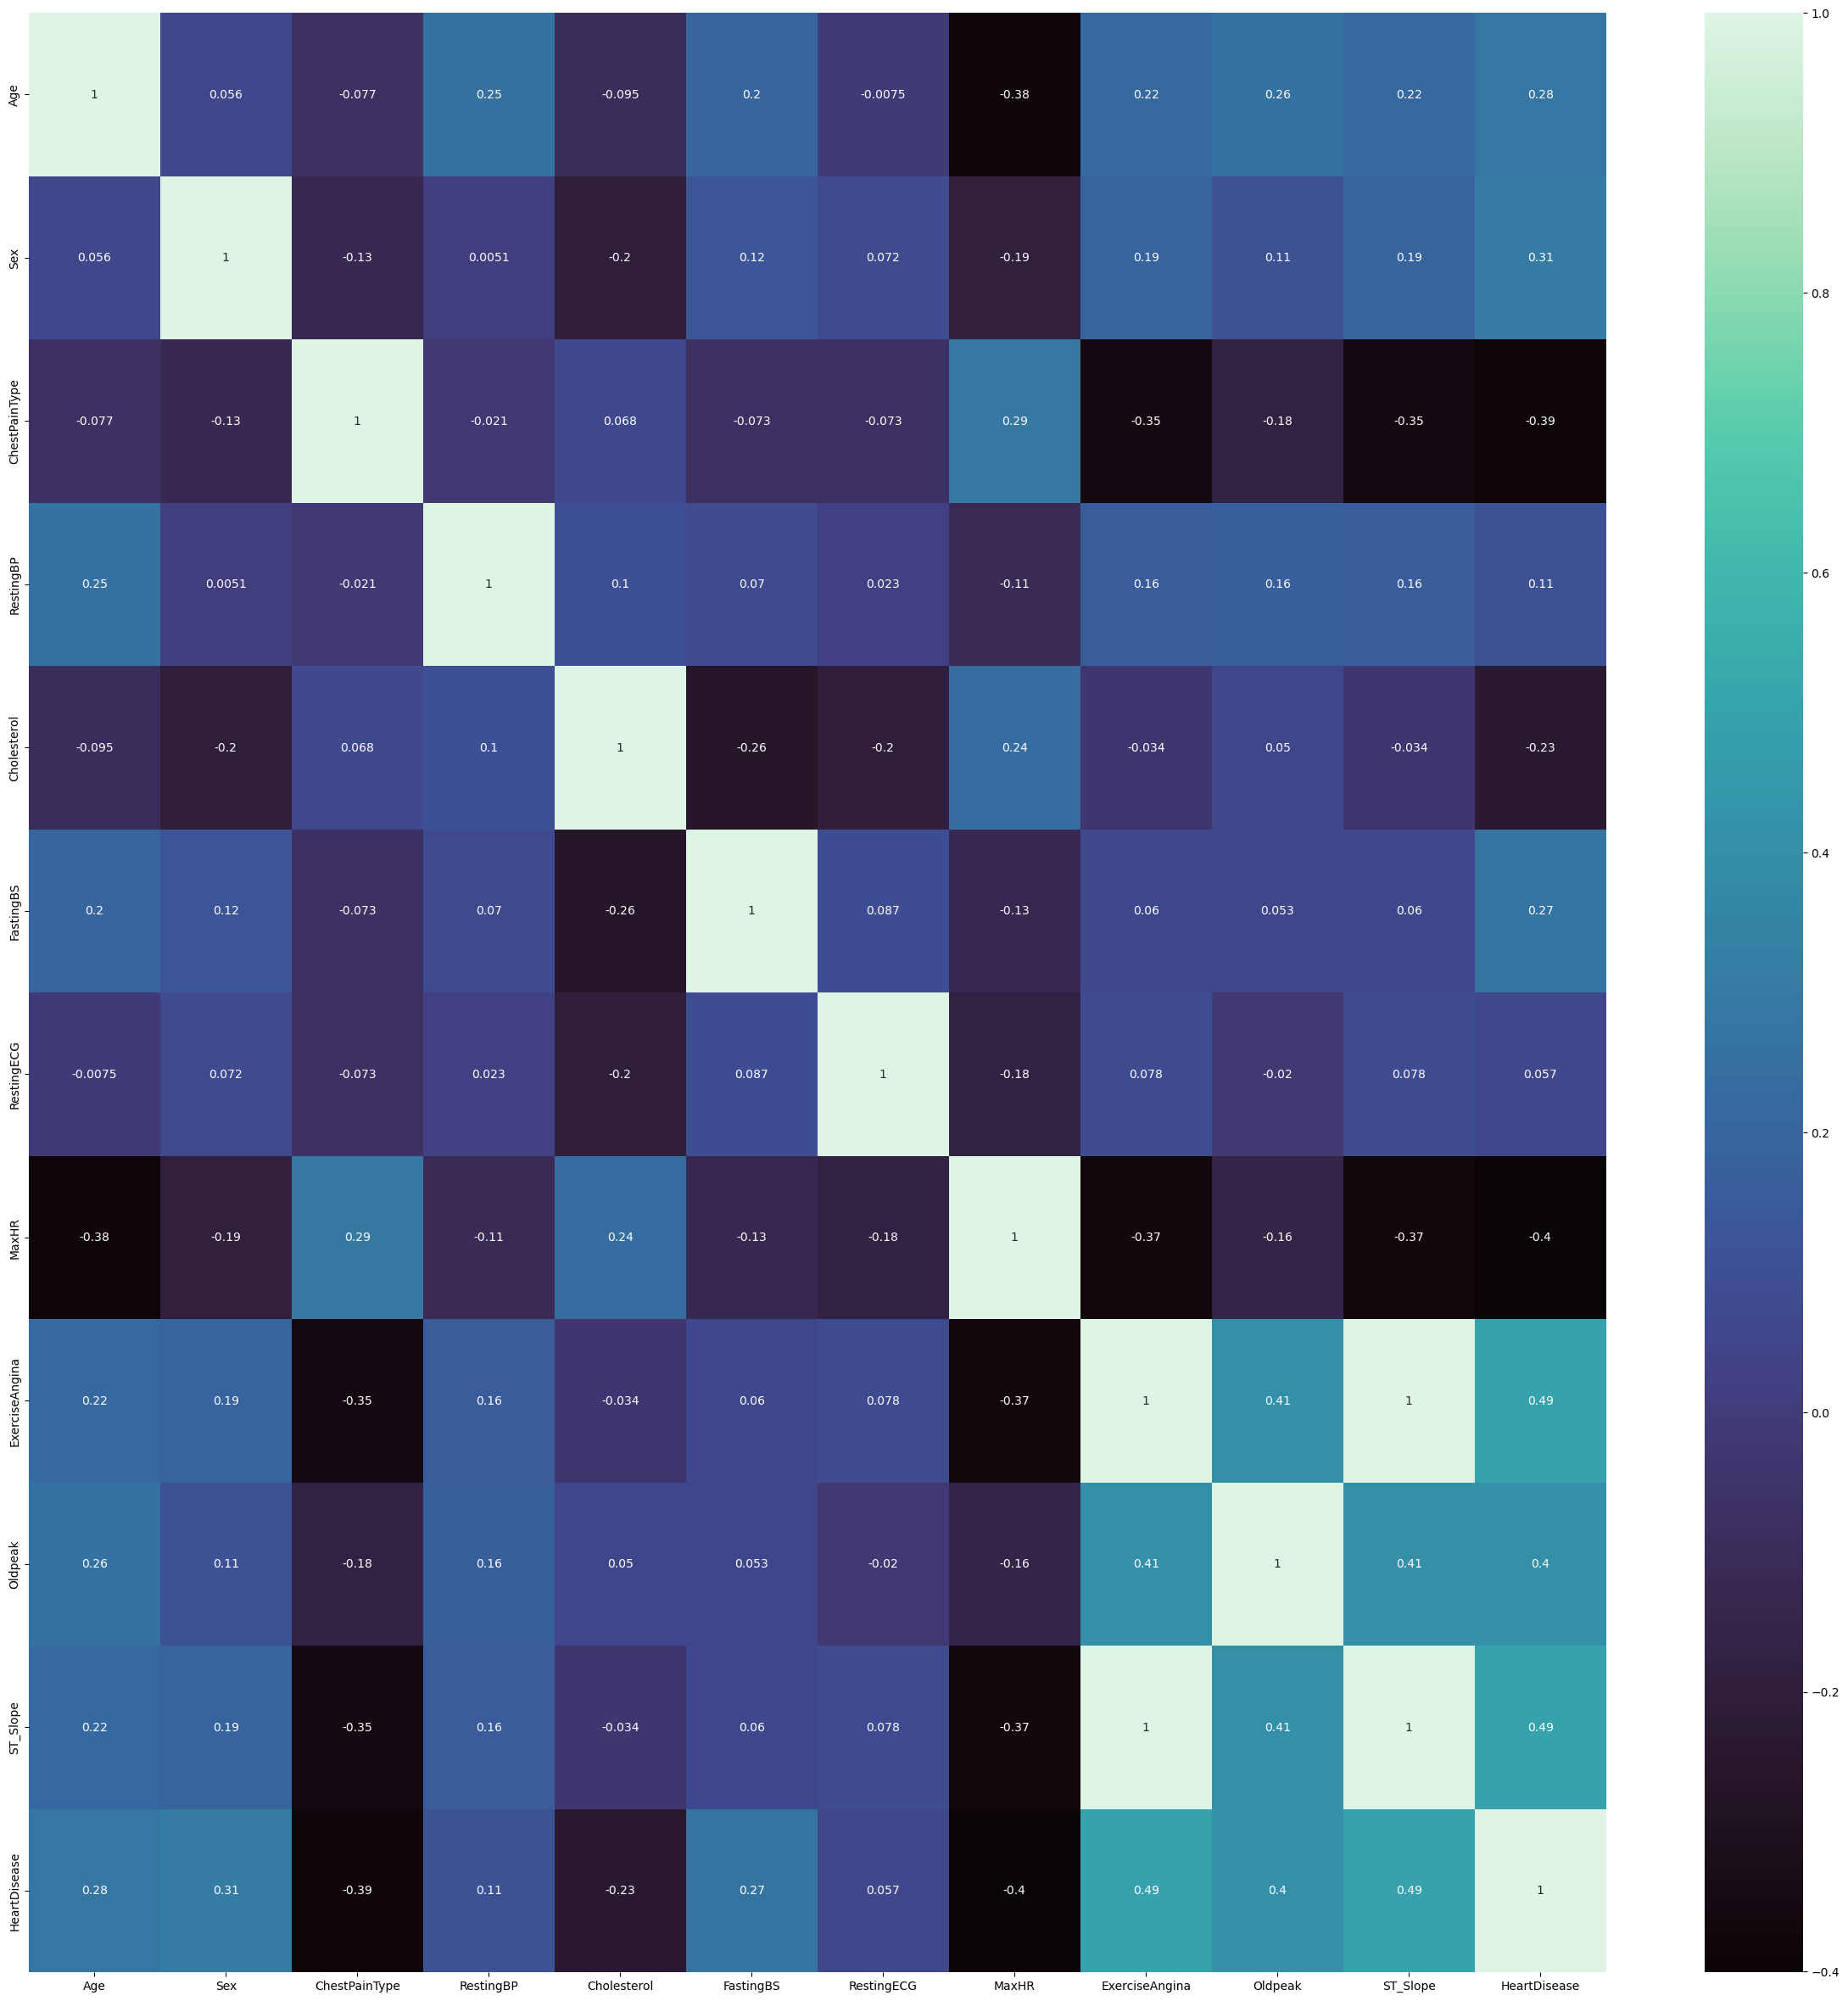

In [139]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(),annot = True ,cmap = 'mako')

In [83]:
x = df.drop('HeartDisease',axis = 'columns')
x 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,0
1,49,0,2,160,180,0,1,156,0,1.0,0
2,37,1,1,130,283,0,2,98,0,0.0,0
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,0
914,68,1,0,144,193,1,1,141,0,3.4,0
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,0


In [85]:
y = df.HeartDisease
y 

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2) 

## Model naive_bayes 

In [104]:
model = GaussianNB()

In [105]:
model.fit(X_train,y_train)

GaussianNB()

In [106]:
model.score(X_train,y_train)

0.8188010899182562

In [107]:
model.score(X_test,y_test)

0.842391304347826

## model svm 

In [109]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [110]:
model.score(X_train,y_train)

0.7193460490463215

In [111]:
model.score(X_test,y_test)

0.7119565217391305

In [112]:
model = RandomForestClassifier(n_estimators=100) # the number of decision trees 
model.fit(X_train, y_train)

RandomForestClassifier()

In [113]:
model.score(X_train,y_train)

1.0

In [114]:
model.score(X_test,y_test)

0.8206521739130435

In [119]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 51,  20],
       [ 13, 100]], dtype=int64)

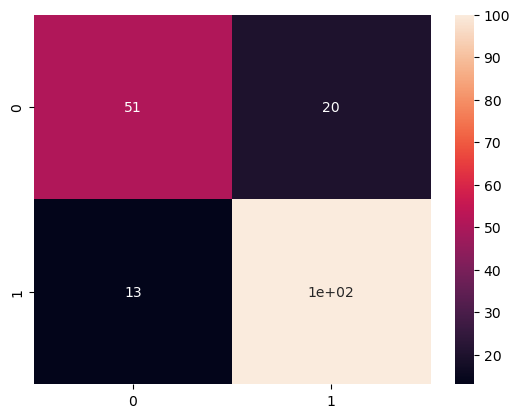

In [124]:
sns.heatmap(cm, annot=True)
plt.show()

## save model

In [116]:
import joblib
joblib.dump(model, "model100")

['model100']